In [1]:
import grax_athena

In [2]:
df = grax_athena.query_data_lake("select id, stagename, end_date from vw_opportunity_monthly")

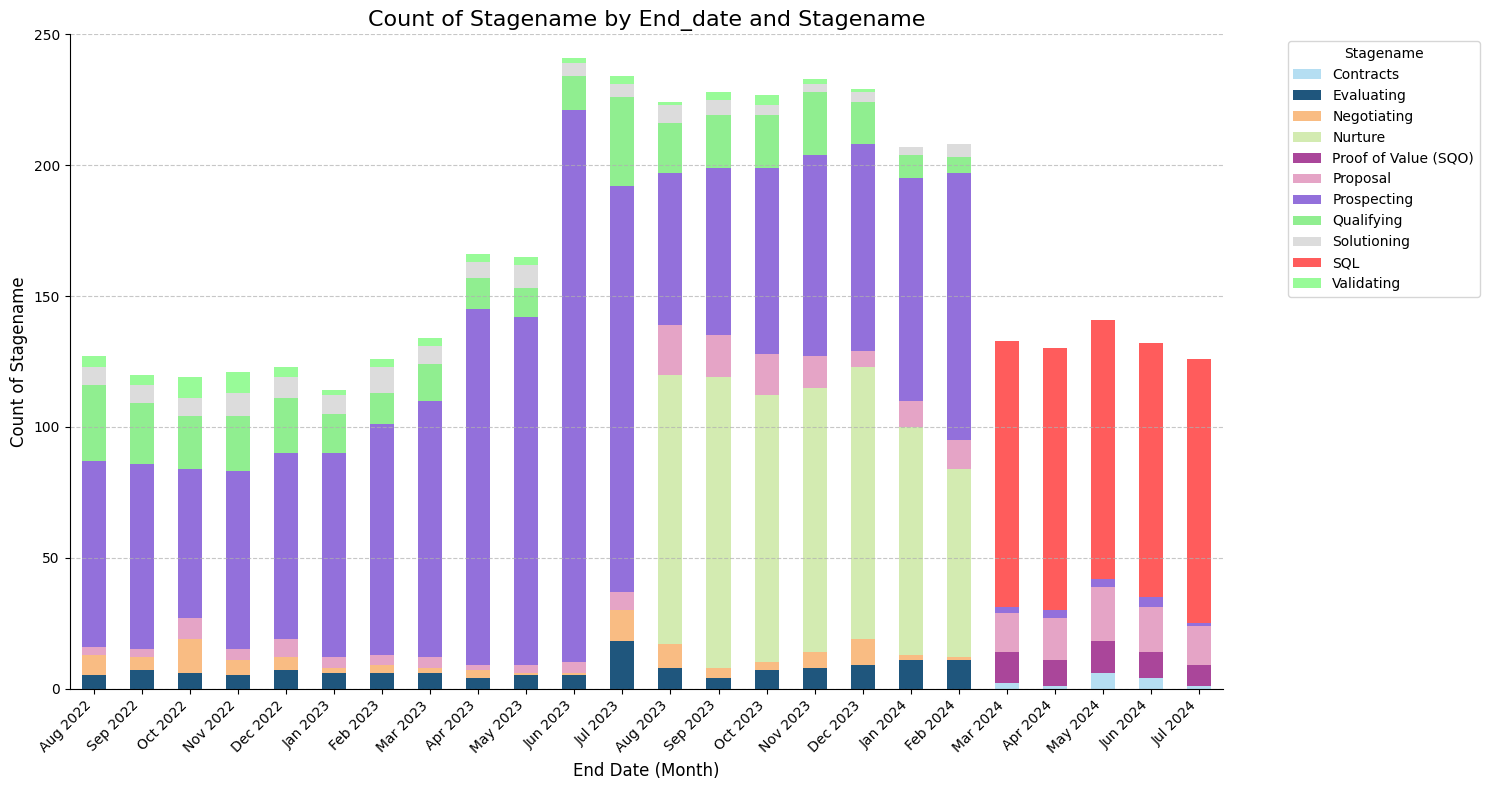

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Convert end_date to datetime
df['end_date'] = pd.to_datetime(df['end_date'])

# Filter the date range to match QuickSight (August 2022 to July 2024)
df = df[(df['end_date'] >= '2022-08-01') & (df['end_date'] <= '2024-07-31')]

# Define the order of stages to match QuickSight
stage_order = ['Contracts', 'Evaluating', 'Negotiating', 'Nurture', 'Proof of Value (SQO)', 
               'Proposal', 'Prospecting', 'Qualifying', 'Solutioning', 'SQL', 'Validating']

# Filter the dataframe to include only the stages we want
df = df[df['stagename'].isin(stage_order)]

# Group by month and stagename, count the occurrences
grouped_data = df.groupby([pd.Grouper(key='end_date', freq='ME'), 'stagename'])['id'].count().unstack(fill_value=0)

# Reorder the columns based on our defined stage order
grouped_data = grouped_data.reindex(columns=stage_order)

# Sort the data by date
grouped_data = grouped_data.sort_index()

# Set up the plot
plt.figure(figsize=(15, 8))
ax = plt.gca()

# Define colors similar to QuickSight
colors = ['#B5DEF2', '#1F567D', '#F9BC83', '#D3EBB1', '#AA469A', 
          '#E5A4C6', '#9370DB', '#90EE90', '#DCDCDC', '#FF5C5C', '#98FB98']

# Create the stacked bar chart
grouped_data.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Customize the chart
plt.title('Count of Stagename by End_date and Stagename', fontsize=16)
plt.xlabel('End Date (Month)', fontsize=12)
plt.ylabel('Count of Stagename', fontsize=12)
plt.legend(title='Stagename', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format x-axis labels
ax.set_xticklabels([date.strftime('%b %Y') for date in grouped_data.index], rotation=45, ha='right')

# Adjust y-axis to match QuickSight (0 to 250)
plt.ylim(0, 250)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()